### IST 652: Scripting for Data Analysis
## Effect of Inflation on Fraud
##### Shintaro Osuga


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from datetime import datetime
import seaborn as sns

#### Data Processing

For this analysis on the effect of inflation on fraud two datasets will be merged to create a more holistic picture of the environment surrounding Fraud. One dataset will encompass the inflation rate of different country for many different years. The second dataset will describe fraudulent activity of different accounts in different countries.

The two datasets are loaded separtely first.

In [3]:
proj_dir       = "~\Documents\Syracuse_MS\Winter_2025\IST_652\Project"
inflation_data = proj_dir + "\data\global_inflation_data.csv"
fraud_data     = proj_dir + "\data\synthetic_fraud_dataset.csv"

inflation_df = pd.read_csv(inflation_data)
fraud_df = pd.read_csv(fraud_data)

In [4]:
''' This function will take a city name convert that to one of the country names present in the dictionary premade '''
def city2country(city):
    country = {"Sydney":"Australia",
               "New York":"United States",
               "Mumbai":"India",
               "Tokyo":"Japan",
               "London":"United Kingdom"}
    
    if city in country.keys():
        return country[city]
    else:
        return -1
''' This function will take a row of data from a pd dataframe and return the inflation amount for that row's year '''
def get_inflation_of_year_per_country(row):
    country = row["country_name"]
    year = row["year"]
    return inflation_df[inflation_df["country_name"] == country][year]

To make the fraud dataset fit our needs 5 processing steps must be taken first, these steps are:
1. Changing the city name present in the dataset into a country name as that is what the inflation dataset uses and is what the two will merge on
2. As the fraud dataset contains both fraudulent and non-fraudulent activity, the non-fraudulent activities must be filtered out
3. The fraud dataset contains date time labels as strings, which must be first parsed so that they are datetime objects which can be accessed and utilized later. This is then turned into a new column in the fraud dataset called 'year' which represents the activity year, which will be used later when getting the inflation data for that country for that year.
4. The inflation for that country during that year must be retrieved from the inflation dataset. This is done by iterating through the rows of the fraud dataset and utilizing the 'year' column made in the previous step as well as the 'country_name' column made in the first step to grab the correct inflation value from the inflation dataset.
5. The last processing step is to interpret the timestamp string in the fraud dataset into a datetime object which will allow us to interpret it easier and utilize in future analysis.

In [5]:
fraud_df["country_name"] = fraud_df['Location'].apply(city2country)
fraud_df = fraud_df[fraud_df["Fraud_Label"] == 1]
fraud_df["year"] = fraud_df["Timestamp"].apply(lambda x : str(datetime.strptime(x, "%Y-%m-%d %H:%M:%S").year))

infvals = []
for idx, row in fraud_df.iterrows():
    country = row["country_name"]
    year = row["year"]
    infvals.append(inflation_df[inflation_df["country_name"] == country][year].values[0])
fraud_df["inflation"] = infvals

fraud_df['Timestamp_dt'] = pd.to_datetime(fraud_df['Timestamp'])
    

In [6]:
inflation_df

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Annual average inflation (consumer prices) rate,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,...,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
4,Angola,Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,...,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,Annual average inflation (consumer prices) rate,25.2,69.6,95.4,49.5,64.9,91.6,453.5,360.4,...,0.60,2.70,3.50,3.50,2.8,3.20,1.80,3.20,3.4,3.4
192,West Bank and Gaza,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.40,-0.20,0.20,-0.20,1.6,-0.70,1.20,3.70,3.4,2.7
193,Yemen,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.00,21.30,30.40,33.60,15.7,21.70,31.50,29.50,14.9,17.3
194,Zambia,Annual average inflation (consumer prices) rate,11.7,14.0,12.5,19.7,20.0,37.4,48.0,43.0,...,10.10,17.90,6.60,7.50,9.2,15.70,22.00,11.00,10.6,9.6


In [7]:
fraud_df

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,country_name,year,inflation,Timestamp_dt
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,186,2203.36,Password,0.0959,0,1,United States,2023,4.1,2023-06-07 04:01:00
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,226,1909.29,Biometric,0.8400,0,1,India,2023,5.5,2023-06-20 15:25:00
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,76,1311.86,OTP,0.7935,0,1,United States,2023,4.1,2023-12-07 00:31:00
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,140,966.98,Password,0.3819,1,1,India,2023,5.5,2023-11-11 23:44:00
7,TXN_49498,USER_4660,7.08,ATM Withdrawal,2023-02-25 03:43:00,45826.27,Tablet,London,Restaurants,0,...,182,1764.66,Biometric,0.5326,0,1,United Kingdom,2023,7.7,2023-02-25 03:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49984,TXN_2433,USER_3990,8.44,POS,2023-10-24 19:27:00,96536.12,Laptop,London,Travel,0,...,159,940.42,Biometric,0.9602,0,1,United Kingdom,2023,7.7,2023-10-24 19:27:00
49993,TXN_16850,USER_4192,202.66,Bank Transfer,2023-04-18 09:22:00,98989.44,Laptop,London,Groceries,0,...,195,1939.25,Password,0.3458,1,1,United Kingdom,2023,7.7,2023-04-18 09:22:00
49996,TXN_44732,USER_1171,126.15,POS,2023-05-09 08:55:00,28791.75,Mobile,Tokyo,Clothing,0,...,93,2555.72,Biometric,0.3653,0,1,Japan,2023,3.2,2023-05-09 08:55:00
49998,TXN_860,USER_2248,64.89,Bank Transfer,2023-03-09 19:47:00,67895.67,Mobile,Tokyo,Electronics,0,...,72,4886.92,Biometric,0.7063,0,1,Japan,2023,3.2,2023-03-09 19:47:00


Once the the fraud dataset is processed and ready to be used, the two datasets are merged together on to the fraud dataset on the 'country_name'. This removes all of the countries which are not included in the inflation dataset leaving us with only the countries which are present in the fraud dataset.

In [8]:
merged_df = pd.merge(inflation_df, fraud_df, on="country_name", how="right")

In [9]:
merged_df

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,year,inflation,Timestamp_dt
0,United States,Annual average inflation (consumer prices) rate,13.5,10.4,6.2,3.2,4.4,3.5,1.9,3.6,...,Mastercard,186,2203.36,Password,0.0959,0,1,2023,4.1,2023-06-07 04:01:00
1,India,Annual average inflation (consumer prices) rate,11.3,12.7,7.7,12.6,6.5,6.3,8.9,9.1,...,Visa,226,1909.29,Biometric,0.8400,0,1,2023,5.5,2023-06-20 15:25:00
2,United States,Annual average inflation (consumer prices) rate,13.5,10.4,6.2,3.2,4.4,3.5,1.9,3.6,...,Visa,76,1311.86,OTP,0.7935,0,1,2023,4.1,2023-12-07 00:31:00
3,India,Annual average inflation (consumer prices) rate,11.3,12.7,7.7,12.6,6.5,6.3,8.9,9.1,...,Mastercard,140,966.98,Password,0.3819,1,1,2023,5.5,2023-11-11 23:44:00
4,United Kingdom,Annual average inflation (consumer prices) rate,16.8,12.2,8.5,5.2,4.4,5.2,3.6,4.1,...,Discover,182,1764.66,Biometric,0.5326,0,1,2023,7.7,2023-02-25 03:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16062,United Kingdom,Annual average inflation (consumer prices) rate,16.8,12.2,8.5,5.2,4.4,5.2,3.6,4.1,...,Visa,159,940.42,Biometric,0.9602,0,1,2023,7.7,2023-10-24 19:27:00
16063,United Kingdom,Annual average inflation (consumer prices) rate,16.8,12.2,8.5,5.2,4.4,5.2,3.6,4.1,...,Visa,195,1939.25,Password,0.3458,1,1,2023,7.7,2023-04-18 09:22:00
16064,Japan,Annual average inflation (consumer prices) rate,7.8,4.9,2.7,1.9,2.3,2.0,0.6,0.1,...,Visa,93,2555.72,Biometric,0.3653,0,1,2023,3.2,2023-05-09 08:55:00
16065,Japan,Annual average inflation (consumer prices) rate,7.8,4.9,2.7,1.9,2.3,2.0,0.6,0.1,...,Discover,72,4886.92,Biometric,0.7063,0,1,2023,3.2,2023-03-09 19:47:00


<Axes: xlabel='Risk_Score', ylabel='Transaction_Amount'>

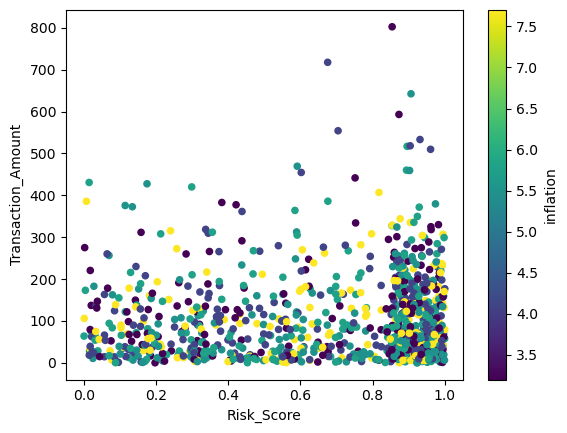

In [19]:
merged_df[["Risk_Score", "Transaction_Amount", "inflation"]].iloc[0:1000].plot.scatter(x="Risk_Score",
                                                                          y="Transaction_Amount",
                                                                          c="inflation")

### Analysis

##### Analysis 1

What are the differences in transactional amount by country?

To start off the analysis the total transaction amount, which is the total amount of money moved in each account for each country is created. As shown below all of the countries have similar amounts of money moved as transactions with Australia having the lowest and United States having the highest, but only with a discrepency of about 12,000 dollars.

In [15]:
merged_df.groupby(["country_name"])["Transaction_Amount"].sum()

country_name
Australia         313112.40
India             311294.35
Japan             330928.09
United Kingdom    321077.68
United States     325205.13
Name: Transaction_Amount, dtype: float64

Looking at the box and whisker plot created for the countries against their transaction amount, it can be seen that all of the countries have a relatively small range or values as well a a mean and standard deviation, but they also have many outliers. Australia with the smallest amount of money transacted has a noticibly smaller range of outliers with their furthest outlier lying just below 800 while the United States with the most amount of money transacted has the highest outlier range with the furthest point lying just past 1,000 dollars.

<Axes: title={'center': 'Transaction_Amount'}, xlabel='country_name'>

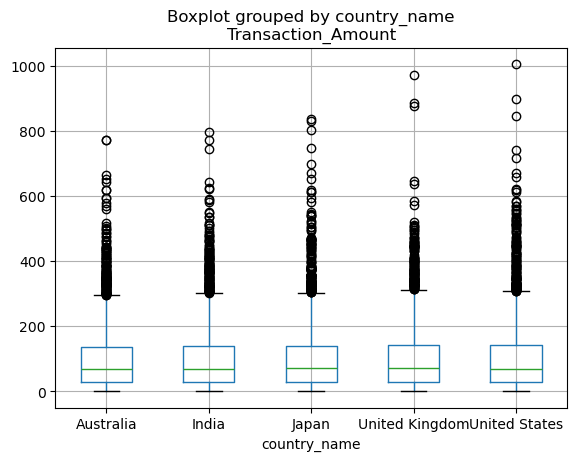

In [18]:
merged_df.boxplot(column=["Transaction_Amount"], by="country_name")

##### Analysis 2

Does inflation effect the category which fraudulent activity occur more in?

The first indepth analysis will be on the change of the mean amount of transacted money in a each category during different inflation rates.

Looking at the result below it can be seen that when there is lower inflation there is a lower amount of mean transacted money in the Groceries and Travel categories while during a high inflation there is a a higher overall amount of transacted money with only travel having a lower value. Furthermore, when inflation is between 4.1 to 5.8 the lows and highs vary with travel being higher throughout with the others changing throughout.


In [145]:
round(merged_df.groupby(["inflation", "Merchant_Category"])[["Transaction_Amount"]].mean(), 2)

Transaction_Amount
inflation Merchant_Category                    
3.2       Clothing                       101.81
          Electronics                    100.91
          Groceries                       98.68
          Restaurants                    102.40
          Travel                          95.59
4.1       Clothing                       100.99
          Electronics                    103.02
          Groceries                       99.86
          Restaurants                     97.36
          Travel                         103.80
5.5       Clothing                        97.41
          Electronics                    102.90
          Groceries                       98.55
          Restaurants                     91.76
          Travel                         102.24
5.8       Clothing                        91.29
          Electronics                     94.49
          Groceries                      101.69
          Restaurants                    100.06
          Travel                         102.33
7.7       Clothing                       100.09
          Electronics                    102.02
          Groceries                      101.03
          Restaurants                    106.11
          Travel                          95.43

These small deviances can be seen in the 4 different box and whisker plot showing the range, mean, standard deviation, and outliers for each merchant category. The small differences in the average outlier distance can be seen to follow the results from the numerical analysis, showing that the overall average transacted amount is around the same but the outliers are what differentiates the differences between the inflation rates and merchant categories.

--------------------------------- Clothing ---------------------------------


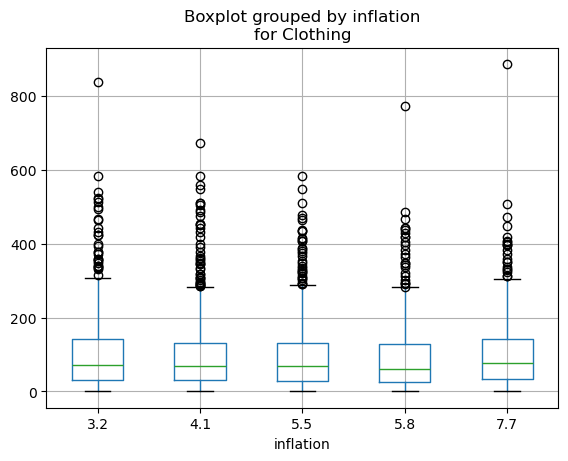

--------------------------------- Restaurants ---------------------------------


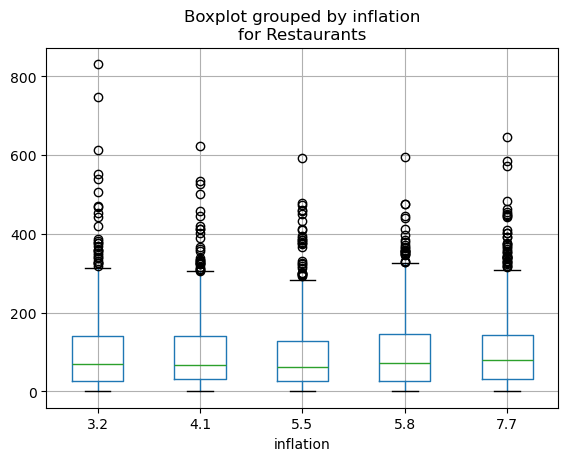

--------------------------------- Electronics ---------------------------------


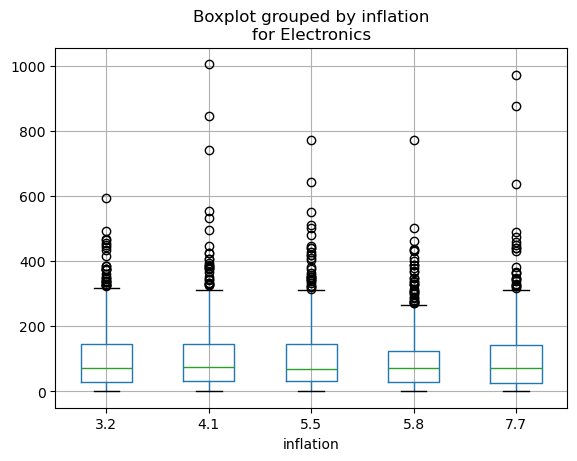

--------------------------------- Groceries ---------------------------------


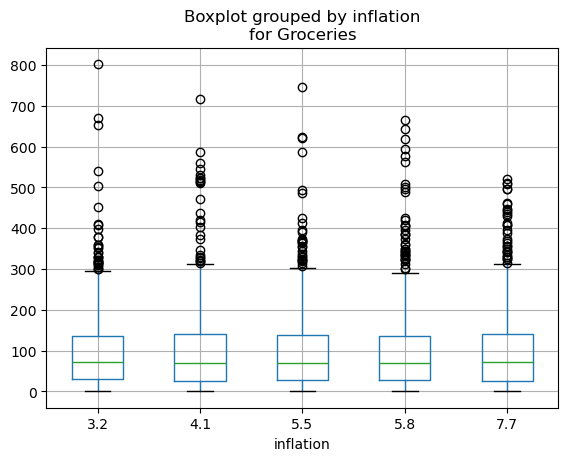

--------------------------------- Travel ---------------------------------


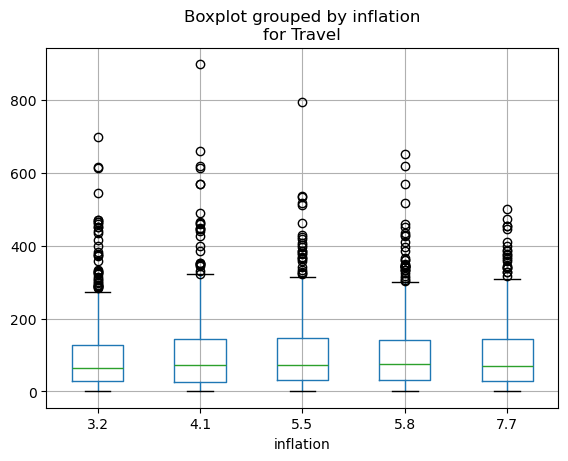

In [ ]:
plot_df = merged_df
plot_df["temp_fact"] = plot_df['Merchant_Category'].factorize()[0]
for cat in plot_df['Merchant_Category'].unique():
    print(f"--------------------------------- {cat} ---------------------------------")
    plot_df[plot_df['Merchant_Category'] == cat].boxplot(column='Transaction_Amount', by='inflation')
    plt.title("for "+cat)
    plt.show()

##### Analysis 3

How does inflation affect risk?

Looking at the distribution of the mean Risk Score between the different inflation rates, it can be seen that it is roughly the same throughout all of the different inflation rates, but there can be seen a small increase when the inflation is between 5.5 and 5.8 while the lowest at 4.1. This might indicate that there is a slightly higher amount of Risk of fraudulent activity when there is a inflation rate between 5.5 and 5.8.

In [146]:
round(merged_df.groupby(["inflation"])[["Risk_Score"]].mean(), 2)

,Risk_Score
inflation,
3.2,0.66
4.1,0.65
5.5,0.67
5.8,0.67
7.7,0.66


Delving deeper into the risk score throughout the different inflation rates, the different categories have more variation and often times higher risk scores when the inflation rate is between 4.1 and 5.8 with some reaching up to 0.68.

In [147]:
round(merged_df.groupby(["inflation", "Merchant_Category"])[["Risk_Score"]].mean(), 2)

Risk_Score
inflation Merchant_Category            
3.2       Clothing                 0.66
          Electronics              0.66
          Groceries                0.67
          Restaurants              0.66
          Travel                   0.66
4.1       Clothing                 0.66
          Electronics              0.65
          Groceries                0.65
          Restaurants              0.67
          Travel                   0.64
5.5       Clothing                 0.68
          Electronics              0.68
          Groceries                0.66
          Restaurants              0.67
          Travel                   0.67
5.8       Clothing                 0.65
          Electronics              0.66
          Groceries                0.68
          Restaurants              0.67
          Travel                   0.67
7.7       Clothing                 0.66
          Electronics              0.67
          Groceries                0.66
          Restaurants              0.65
          Travel                   0.66

Seeing how the risk score changes throughout each category with different inflation rates, lets see how the inflation rate changes with the card age, and what parameters make the risk high and what makes it low.

Looking at the output below it can be seen that the highest average the risk score reached 0.91, when sorted by the inflation rate and the card age. This score was reached when the inflation rate was 5.8 and the card age was 14. This also had a transaction distance of around 2,000 and an account balance of 58,000 as well as 2.36 failed transactions and 7.21 daily transactions.

This follows with the analysis done above with how the highest average overall risk was attained when the inflation rate was between 5.5 and 5.8.

In [108]:
round(merged_df.groupby(["inflation", "Card_Age"])[["Risk_Score",
                                                    "Transaction_Distance", 
                                                    "Account_Balance",
                                                    "Failed_Transaction_Count_7d", 
                                                    "Daily_Transaction_Count"]].mean().sort_values(by="Risk_Score", 
                                                                                                   ascending=False), 2)

Risk_Score  Transaction_Distance  Account_Balance  \
inflation Card_Age                                                      
5.8       14              0.91               2035.62         57926.69   
5.5       172             0.90               1929.42         51239.98   
5.8       174             0.88               2347.43         72516.57   
5.5       113             0.88               3339.29         55258.21   
3.2       94              0.87               2518.40         41861.62   
...                        ...                   ...              ...   
4.1       216             0.36               2985.06         62442.99   
5.8       156             0.35               3568.31         38313.86   
          203             0.33               2466.25         64350.50   
          61              0.24               2269.04         52354.76   
          105             0.23               2551.16         61634.72   

                    Failed_Transaction_Count_7d  Daily_Transaction_Count  
inflation Card_Age                                                        
5.8       14                               2.36                     7.21  
5.5       172                              2.83                     7.67  
5.8       174                              2.29                     6.71  
5.5       113                              3.57                     6.43  
3.2       94                               3.12                     8.12  
...                                         ...                      ...  
4.1       216                              3.60                     8.00  
5.8       156                              3.20                     8.20  
          203                              4.00                     8.20  
          61                               4.00                     7.57  
          105                              3.71                     8.00  

[1195 rows x 5 columns]

##### Analysis 4

What kinds of account usages are more risky at different inflation rates?

Digging deeper into what kinds of activity in the account flags one as high or low risk, comparing the risk values over whether the transaction occurred over a weekend or not, what the inflation rate was, the category of use, and the age of the card the risk is seen being at its highest when a card of age 190 was used on weekend on clothing during a time when inflation was around 4.1. This raised a risk score of 0.9999, which is the highest one could go essentially. This is interesting as the second highest risk score was attained by a account which on a weekend, bought groceries with a card of age 220, during a period with 3.2 inflation rate. This score was also 0.9999, but thinking on how commonly people buy groceries over the weekend and a inflation rate of 3.2 is not very low nor high, there must be something more to what makes this such a high risk activity. 

In [123]:
merged_df.groupby(["Is_Weekend", "inflation", "Merchant_Category","Card_Age"])[["Risk_Score"]].mean().sort_values(by="Risk_Score", ascending=False)

Risk_Score
Is_Weekend inflation Merchant_Category Card_Age            
1          4.1       Clothing          190           0.9999
           3.2       Groceries         220           0.9999
0          5.8       Travel            24            0.9998
1          7.7       Groceries         131           0.9997
0          3.2       Travel            106           0.9997
...                                                     ...
1          5.5       Travel            168           0.0022
0          5.5       Travel            94            0.0020
           7.7       Groceries         68            0.0010
1          5.8       Travel            59            0.0009
           4.1       Travel            146           0.0005

[8313 rows x 1 columns]

To search deeper this time the the activities like transaction type, device type, card type and authentication method are used to get a better understanding of what kind of card and what kind of security has a high risk score. Looking at the highest risk score account it was a Amex card with the fraudulent activity being though an ATM withdrawal, uses a tablet and had a biometric authentication security. This is very interesting and also understandable that this would be flagged as high risk, as the transaction type was ATM Withdrawal which could mean someone stole their card and their pin as well. What is interesting is that the highest risk score for these values is about 0.75 which is almost 0.25 less than pervious, meaning there must be some activity type which wasn't covered which the top 25% highest risk score people fall in. Another interesting find is that the inflation rate for all of the high risk accounts are also during when the inflation was around 5% indicating there might be a correlation between fraudulent activity where accounts with these types of parameters have a higher likelihood of coming across when the inflation rate is 5%.

In [143]:
merged_df.groupby(["Transaction_Type", "Device_Type","Card_Type", "Authentication_Method"])[["inflation","Risk_Score"]].mean().sort_values(by="Risk_Score", ascending=False)

inflation  \
Transaction_Type Device_Type Card_Type  Authentication_Method              
ATM Withdrawal   Tablet      Amex       Biometric               5.417857   
Online           Mobile      Amex       OTP                     5.342169   
ATM Withdrawal   Mobile      Mastercard PIN                     5.134615   
Online           Laptop      Discover   Password                5.382051   
ATM Withdrawal   Tablet      Amex       Password                5.219753   
...                                                                  ...   
                             Visa       Password                5.174118   
POS              Tablet      Amex       OTP                     5.334831   
ATM Withdrawal   Mobile      Mastercard OTP                     5.269412   
Online           Mobile      Discover   Password                5.521429   
                 Laptop      Discover   OTP                     5.412500   

                                                               Risk_Score  
Transaction_Type Device_Type Card_Type  Authentication_Method              
ATM Withdrawal   Tablet      Amex       Biometric                0.750826  
Online           Mobile      Amex       OTP                      0.741718  
ATM Withdrawal   Mobile      Mastercard PIN                      0.738751  
Online           Laptop      Discover   Password                 0.734796  
ATM Withdrawal   Tablet      Amex       Password                 0.730914  
...                                                                   ...  
                             Visa       Password                 0.592535  
POS              Tablet      Amex       OTP                      0.586038  
ATM Withdrawal   Mobile      Mastercard OTP                      0.582204  
Online           Mobile      Discover   Password                 0.575758  
                 Laptop      Discover   OTP                      0.551001  

[192 rows x 2 columns]

Searching wider and deeper this time the categories card type, failed transaction count, and daily transaction count are used as they relate more to the accounts history and usage as well as the type of card which it is. Looking at the table below it can be seen that a Discover card with 3 failed transactions in the last 7 days as well as 5 daily transactions had the highest risk score of 0.9977. The next highest risk score was 0.9912 with a Amex card which had 1 previous failed transaction and 6 daily transactions when the inflation rate was 5.5. These two show that when the the ratio between the number of failed transactions and daily transactions is low then risk score will be high.

In [144]:
merged_df.groupby(["Card_Type", "inflation", "Failed_Transaction_Count_7d","Daily_Transaction_Count"])[["Risk_Score"]].mean().sort_values(by="Risk_Score", ascending=False)

Risk_Score
Card_Type  inflation Failed_Transaction_Count_7d Daily_Transaction_Count            
Discover   4.1       3                           5                          0.997700
Amex       5.5       1                           6                          0.991200
Visa       3.2       2                           14                         0.988600
           5.8       3                           14                         0.980333
Discover   5.8       3                           14                         0.979267
...                                                                              ...
Mastercard 7.7       4                           10                         0.380203
                                                 1                          0.371854
Visa       7.7       4                           12                         0.370923
Amex       4.1       4                           12                         0.367932
Visa       5.5       4                           13                         0.337848

[1394 rows x 1 columns]

Combining what was found earlier, it is found that a activity occurring on a weekday on clothing through bank transfer on tablet, on a account with a age 29 Discover card with OTP authentication that has had 0 previous failed transactions while also having 8 daily transactions when the inflation is 5.8% has the highest risk score of 1.0. Through this it can be reasonably said that most accounts are vulnerable to attacks and fraudulent activity but most of the higher risk ones are done purchasing clothing when the inflation rate is low or medium, between 3 and 6.

In [140]:
merged_df.groupby(["Is_Weekend", "Merchant_Category","Card_Age", "Transaction_Type", "Device_Type","Authentication_Method", "Card_Type", "Failed_Transaction_Count_7d","Daily_Transaction_Count"])[["inflation", "Risk_Score"]].mean().sort_values(by="Risk_Score", ascending=False)

inflation  \
Is_Weekend Merchant_Category Card_Age Transaction_Type Device_Type Authentication_Method Card_Type  Failed_Transaction_Count_7d Daily_Transaction_Count              
0          Clothing          29       Bank Transfer    Tablet      OTP                   Discover   0                           8                              5.8   
1          Groceries         220      Online           Mobile      Biometric             Mastercard 3                           4                              3.2   
0          Restaurants       170      POS              Tablet      Password              Mastercard 3                           6                              5.5   
           Travel            67       POS              Laptop      PIN                   Amex       4                           6                              4.1   
                             12       ATM Withdrawal   Laptop      PIN                   Amex       3                           9                              4.1   
...                                                                                                                                                            ...   
           Groceries         194      POS              Tablet      PIN                   Amex       4                           2                              7.7   
1          Clothing          36       ATM Withdrawal   Laptop      Biometric             Amex       4                           4                              7.7   
0          Restaurants       24       POS              Laptop      Biometric             Discover   4                           2                              5.8   
1          Travel            78       Online           Mobile      Password              Discover   4                           11                             7.7   
           Clothing          79       POS              Laptop      OTP                   Visa       4                           12                             5.8   

                                                                                                                                                         Risk_Score  
Is_Weekend Merchant_Category Card_Age Transaction_Type Device_Type Authentication_Method Card_Type  Failed_Transaction_Count_7d Daily_Transaction_Count              
0          Clothing          29       Bank Transfer    Tablet      OTP                   Discover   0                           8                            1.0000  
1          Groceries         220      Online           Mobile      Biometric             Mastercard 3                           4                            0.9999  
0          Restaurants       170      POS              Tablet      Password              Mastercard 3                           6                            0.9999  
           Travel            67       POS              Laptop      PIN                   Amex       4                           6                            0.9999  
                             12       ATM Withdrawal   Laptop      PIN                   Amex       3                           9                            0.9999  
...                                                                                                                                                             ...  
           Groceries         194      POS              Tablet      PIN                   Amex       4                           2                            0.0005  
1          Clothing          36       ATM Withdrawal   Laptop      Biometric             Amex       4                           4                            0.0004  
0          Restaurants       24       POS              Laptop      Biometric             Discover   4                           2                            0.0002  
1          Travel            78       Online           Mobile      Password              Discover   4                           11                           0.0002  
  